In [56]:
import pandas as pd
df = pd.read_csv("hcvdat0.csv")

In [57]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [59]:
df['Sex']= df['Sex'].map({'m':0,'f':1})

In [60]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [61]:
df.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [62]:
df['Category'].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

In [63]:
df['Category']=df['Category'].map({'0=Blood Donor':0,'1=Hepatitis':1,'2=Fibrosis':2,'3=Cirrhosis':3,'0s=suspect Blood Donor':4})

In [64]:
df['Category']

0      0
1      0
2      0
3      0
4      0
      ..
610    3
611    3
612    3
613    3
614    3
Name: Category, Length: 615, dtype: int64

In [65]:
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,0,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,0,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,0,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,0,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [66]:
df.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [83]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  
df[['ALB','ALP','ALT','CHOL','PROT']] = imputer.fit_transform(df[['ALB','ALP','ALT','CHOL','PROT']])

In [84]:
x = df[['ALB','ALP','ALT','AST']]
y=df['Category']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [86]:
knn= KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [87]:
y_pred = knn.predict(x_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8536585365853658

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Category', ylabel='ALB'>

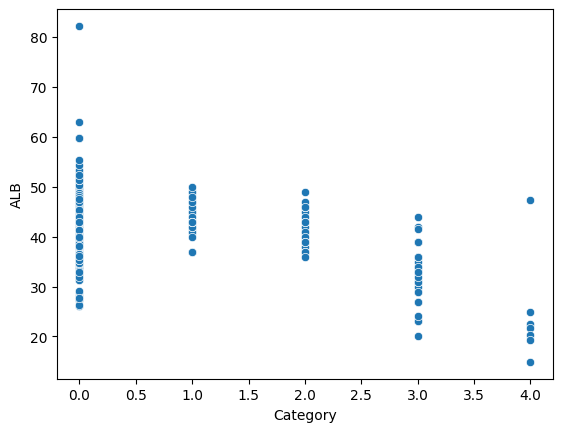

In [95]:
sns.scatterplot(x='Category', y='ALB',data=df)

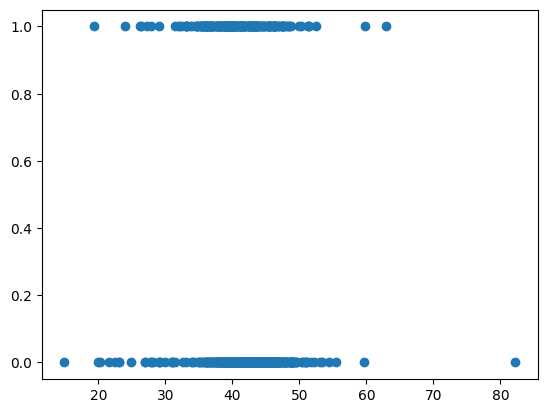

In [98]:
plt.scatter('ALB','Sex',data=df)

<Axes: xlabel='Sex', ylabel='Count'>

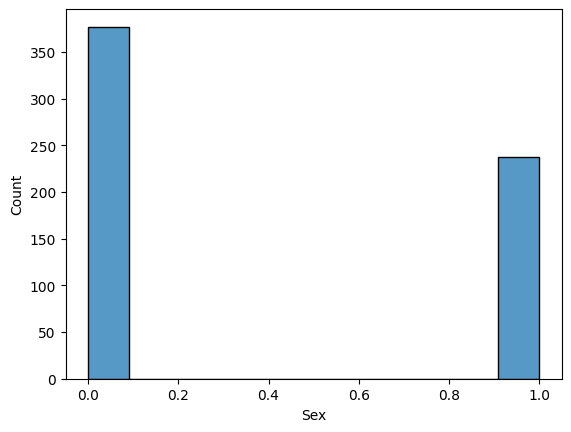

In [99]:
sns.histplot(df['Sex'])

<Axes: xlabel='Category', ylabel='ALB'>

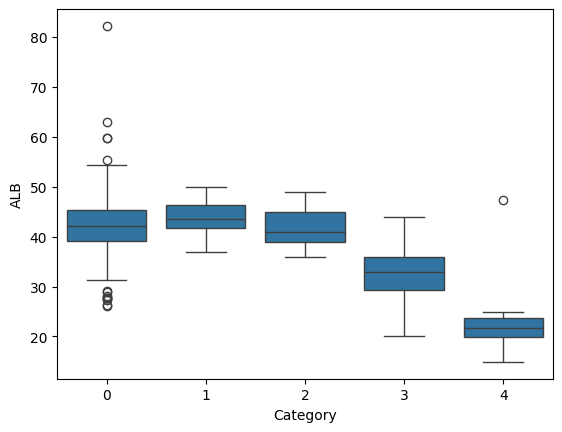

In [100]:
sns.boxplot(x='Category', y='ALB',data=df)


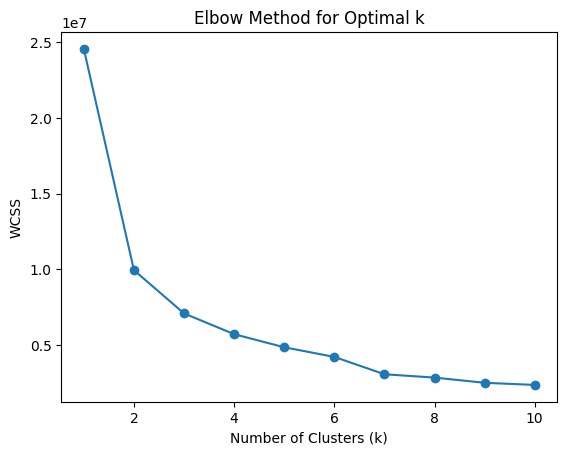

In [104]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):  # Try cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

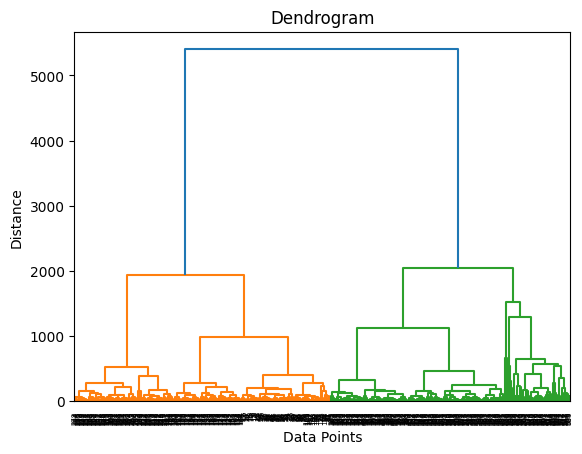

In [109]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(df, 'ward')
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()